# Customer Segmentation Project
by: *Dorothy Kunth*

### Notebook 2 - Exploratory Data Analysis

## Project Overview
The goal is to carry out segmentation of customers using the transaction history of an online gift store occurring between 01/12/2010 and 09/12/2011.

## Project Scope
1. Data Exploration
2. Data Preprocessing
3. **Exploratory Data Analysis**
4. Customer RFM Segmentation using Percentile Ranking
5. Customer RFM Segmentation using Kmeans Clustering

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data

online_trans = pd.read_pickle('../data/online_trans.pkl')
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395624 entries, 2 to 399840
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395624 non-null  object        
 1   stock_code         395624 non-null  object        
 2   description        395624 non-null  object        
 3   price              395624 non-null  float64       
 4   quantity           395624 non-null  int64         
 5   total_order_value  395624 non-null  float64       
 6   invoice_date       395624 non-null  datetime64[ns]
 7   customer_id        395624 non-null  object        
 8   country            395624 non-null  object        
 9   date               395624 non-null  object        
 10  period             395624 non-null  period[M]     
 11  dow                395624 non-null  object        
 12  hour               395624 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), 

## Exploratory Analysis

#### **1. In terms of total revenue, what are the top 10 most popular products?**

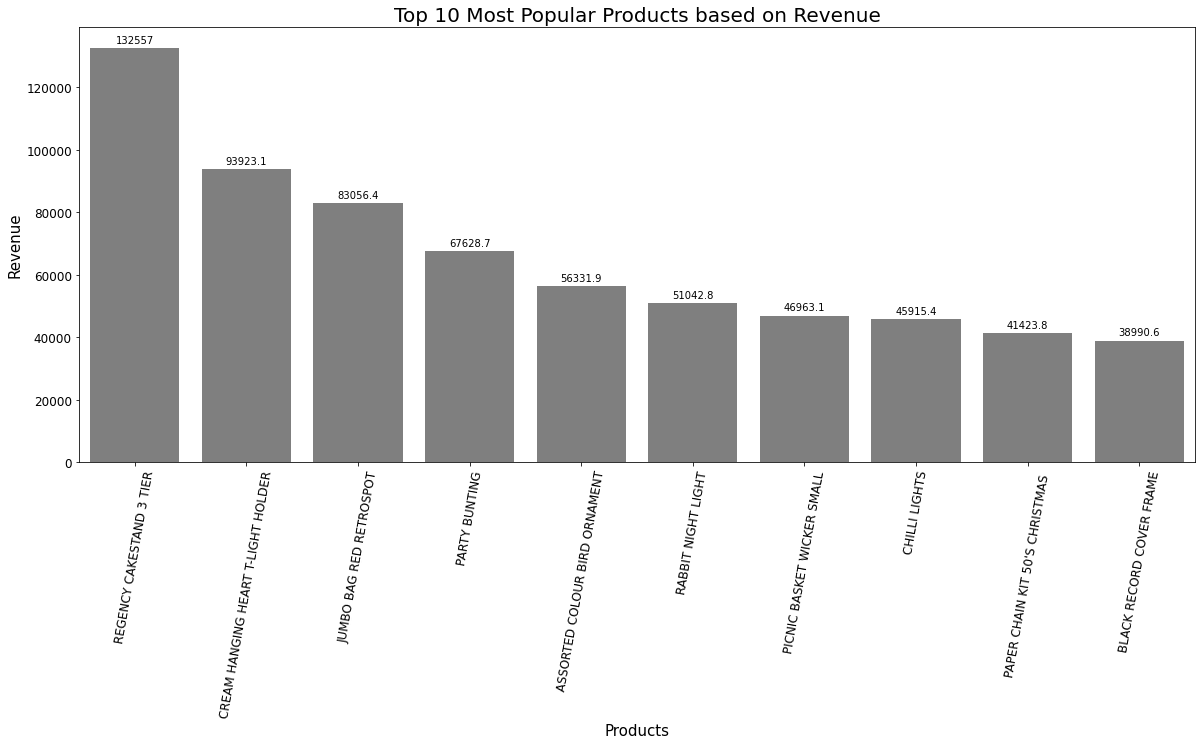

In [3]:
top10_prod_rev = online_trans.groupby(['description'])['total_order_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[7]

ax = sns.barplot(x = top10_prod_rev.index, y = top10_prod_rev.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)
plt.xticks(rotation = 80)
plt.title('Top 10 Most Popular Products based on Revenue', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Revenue', size = 15)
plt.show;

#### **2. In terms of quantity sold, what are the top 10 most popular products?**

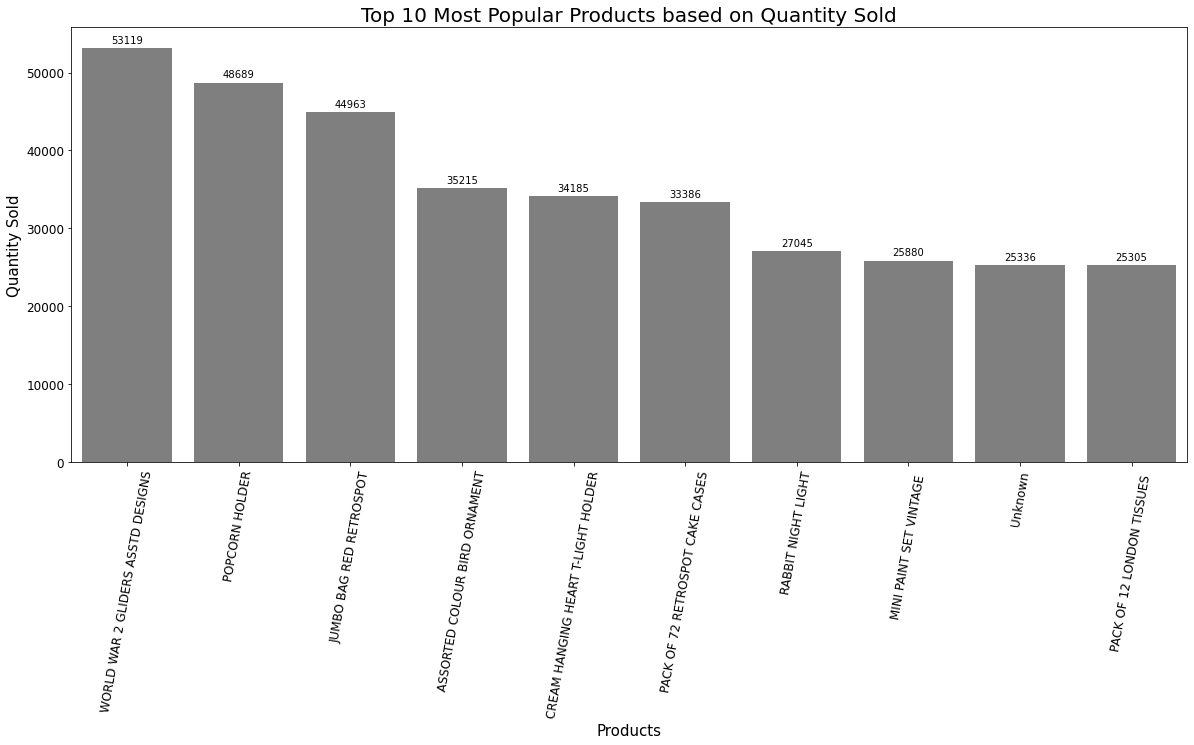

In [4]:
top10_prod_qty = online_trans.groupby(['description'])['quantity'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[7]

ax = sns.barplot(x = top10_prod_qty.index, y = top10_prod_qty.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)
plt.xticks(rotation = 80)
plt.title('Top 10 Most Popular Products based on Quantity Sold', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Quantity Sold', size = 15)
plt.show;

#### **3. Based on total revenue, who are the top 10 customers?**

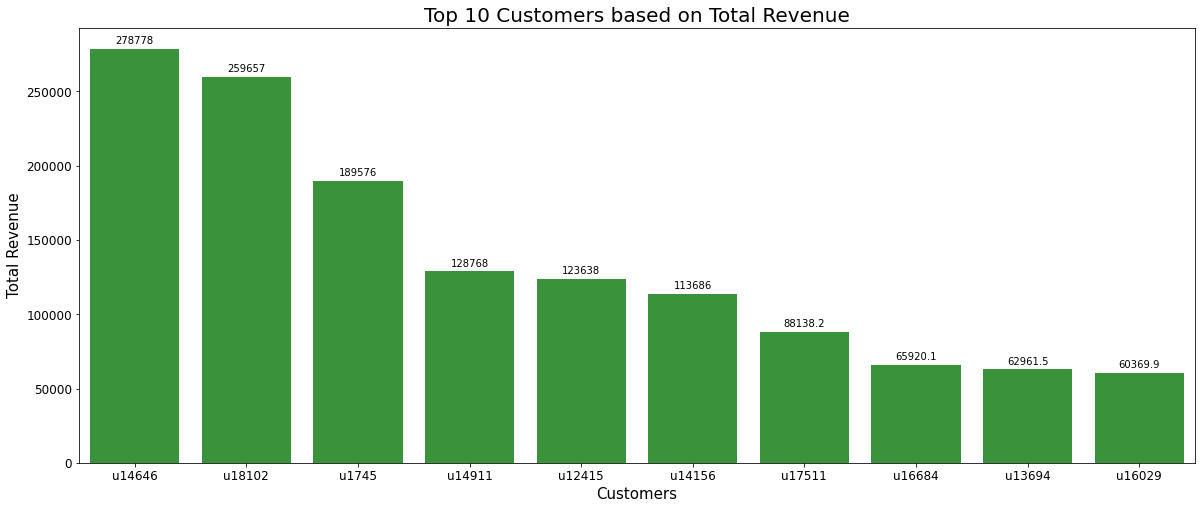

In [5]:
top10_cust_rev = online_trans.groupby(['customer_id'])['total_order_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[2]

ax = sns.barplot(x = top10_cust_rev.index, y = top10_cust_rev.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Customers based on Total Revenue', size = 20)
plt.xlabel('Customers', size = 15)
plt.ylabel('Total Revenue', size = 15)
plt.show;

#### **4. Based on average revenue, who are the top 10 customers?**

In [6]:
# Calculate average revenue per customer (total_order_value / number of unique invoices)

avg_rev_cust = online_trans.groupby(['customer_id']).agg({
    'total_order_value': 'sum',
    'invoice': 'nunique'
}).reset_index()

avg_rev_cust['avg_rev'] = round(avg_rev_cust['total_order_value'] / avg_rev_cust['invoice'], 2)
avg_rev_cust = avg_rev_cust.sort_values('avg_rev', ascending = False)[:10]
avg_rev_cust

,customer_id,total_order_value,invoice,avg_rev
2015,u15098,39619.50,4,9904.88
9,u12357,6207.67,1,6207.67
54,u12415,123638.18,20,6181.91
2508,u15749,21535.90,4,5383.98
276,u12688,4873.81,1,4873.81
193,u1259,9338.38,2,4669.19
327,u12752,4366.78,1,4366.78
4214,u18102,259657.30,60,4327.62
4328,u18251,4314.72,1,4314.72
2683,u16,12393.70,3,4131.23


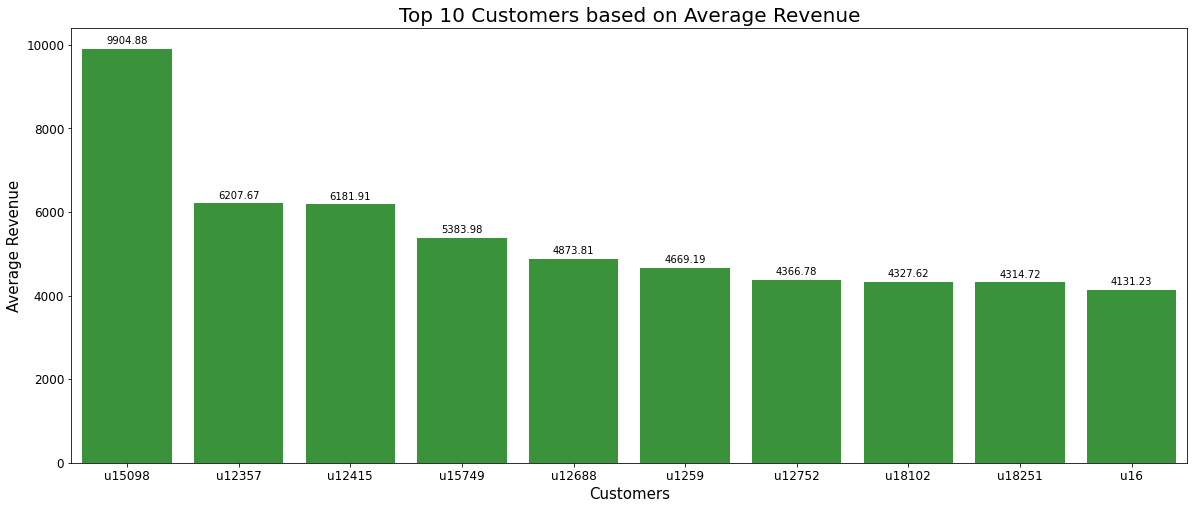

In [7]:
# Visualize top 10 customers based on average revenue

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[2]

ax = sns.barplot(x = avg_rev_cust['customer_id'], y = avg_rev_cust['avg_rev'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Customers based on Average Revenue', size = 20)
plt.xlabel('Customers', size = 15)
plt.ylabel('Average Revenue', size = 15)
plt.show;

#### **5. How much was the revenue per month? Which month has the highest revenue?**

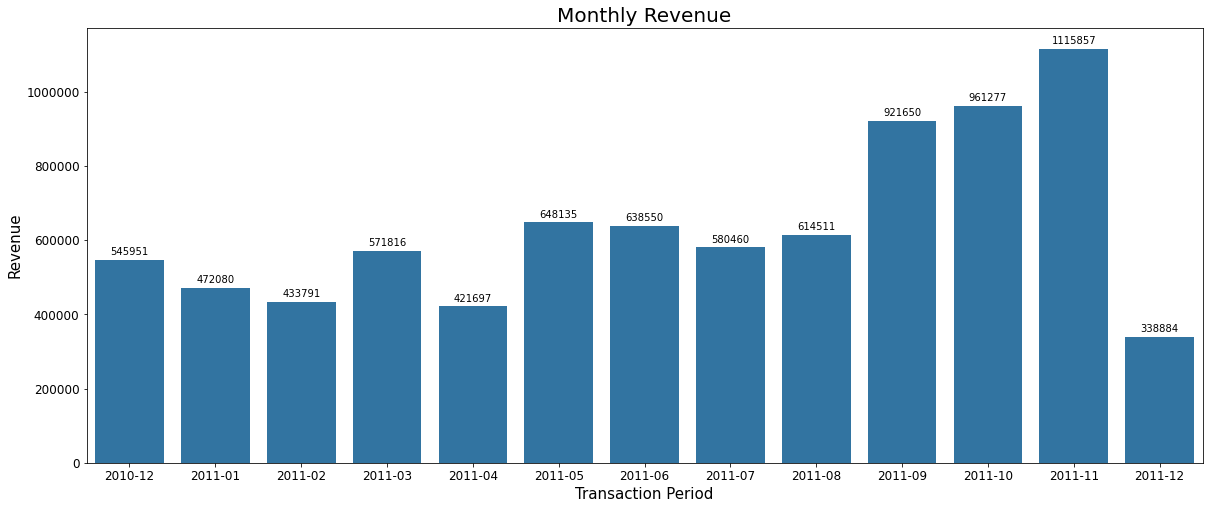

In [8]:
monthly_revenue = online_trans.groupby(['period'])['total_order_value'].sum()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = monthly_revenue.index, y = monthly_revenue.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation 

plt.title('Monthly Revenue', size = 20)
plt.xlabel('Transaction Period', size = 15)
plt.ylabel('Revenue', size = 15)
yticks = [0, 200000, 400000, 600000, 800000, 1000000]
ax.set_yticklabels(yticks)
plt.show();

> The data coverage is from 2010-12-01 to 2011-12-09. The bar plot shows that there was a surge in revenue during September, October, and November 2011. It is evident that the revenue in December 2011 was not that high as it only had 9 days of sales. November 2011 was the best month in terms of total revenue.

#### **6. How does the distribution of invoices per month look?**

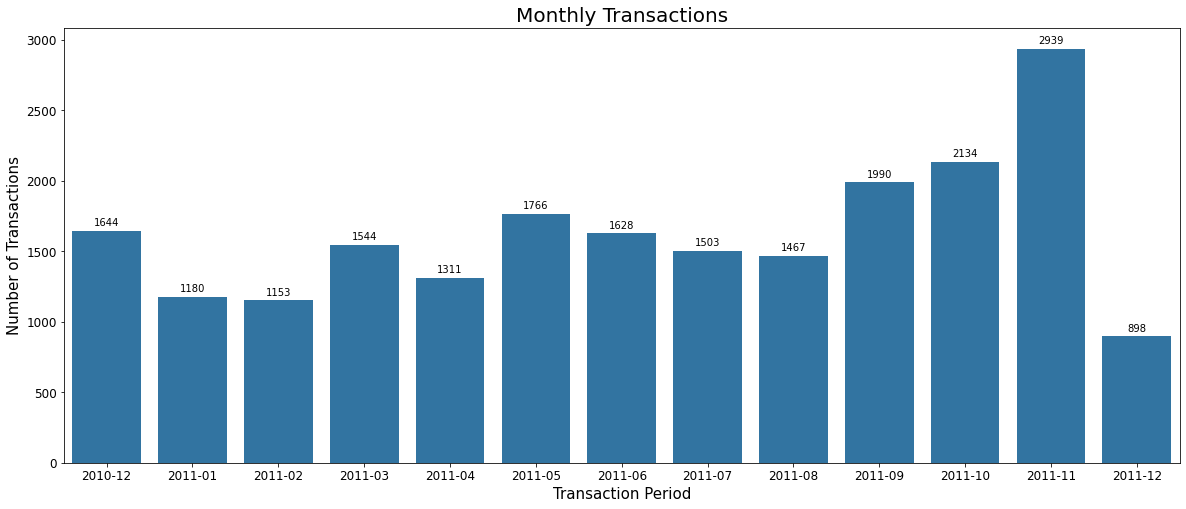

In [9]:
monthly_trans = online_trans.groupby(['period'])['invoice'].nunique()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = monthly_trans.index, y = monthly_trans.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Monthly Transactions', size = 20)
plt.xlabel('Transaction Period', size = 15)
plt.ylabel('Number of Transactions', size = 15)
plt.show();

> The highest number of transactions occurred in November 2011 

#### **7. In 2011, what were the sales figures per day of the week?**

In [10]:
# Calculate total revenue per day of the week for 2011

online_trans_2011 = online_trans[online_trans['invoice_date'].dt.year == 2011]
weekday_rev = online_trans_2011.groupby(['dow'])['total_order_value'].sum()
weekday_rev

dow
Friday       1192108.70
Monday       1195303.13
Sunday        714403.51
Thursday     1753056.62
Tuesday      1457762.21
Wednesday    1406079.32
Name: total_order_value, dtype: float64

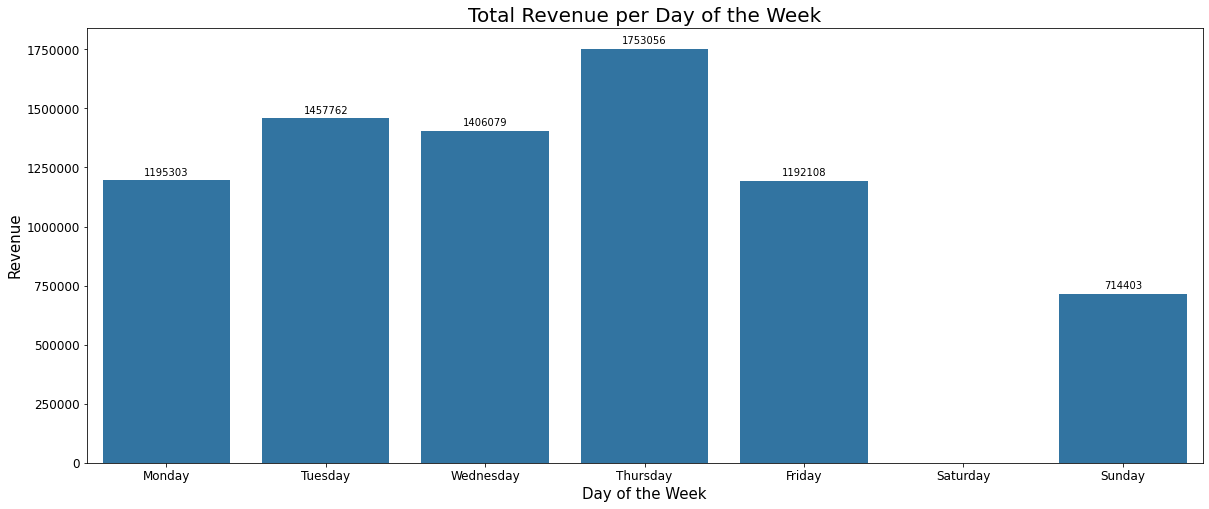

In [11]:
# Visualize total revenue per day of the week

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

# Order to plot the categorical variables in
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(x = weekday_rev.index, y = weekday_rev.values, color = base_color, order = order)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d')# annotates bar plots with labels without scientific notation

plt.title('Total Revenue per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Revenue', size = 15)
yticks = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000]
ax.set_yticklabels(yticks)
plt.show();

> The bar plot shows that Thursdays generated the highest sales/revenue.

#### **8. How does the distribution of invoices per day of the week look?**

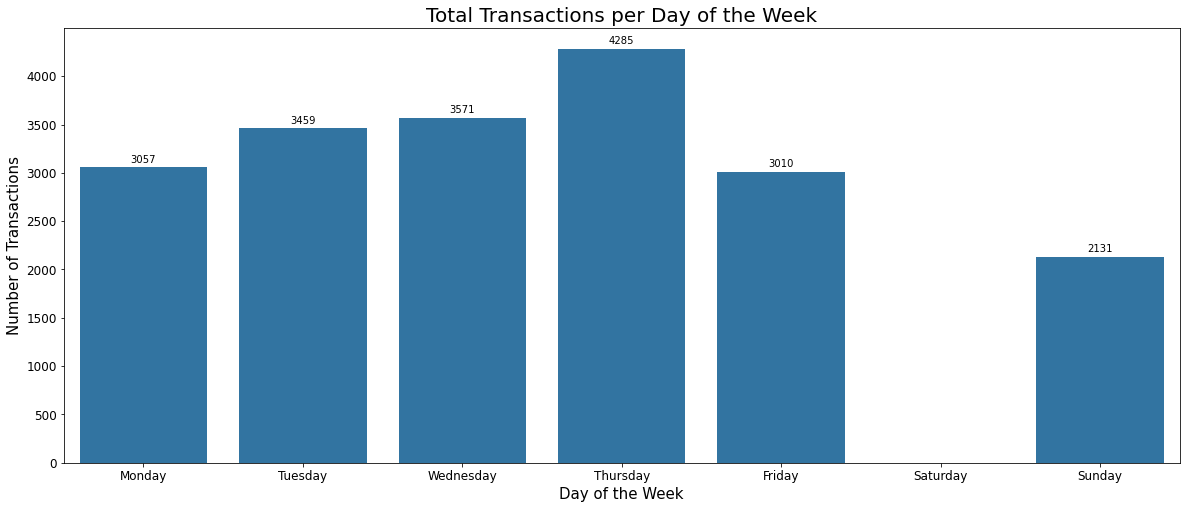

In [12]:
weekday_trans = online_trans_2011.groupby(['dow'])['invoice'].nunique()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

# Order to plot the categorical variables in
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(x = weekday_trans.index, y = weekday_trans.values, color = base_color, order = order)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Total Transactions per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Number of Transactions', size = 15)
plt.show();

> Similar to revenue per day of the week, the bar plot shows that Thursdays had the highest number of transactions.

#### **9. How did 2011 look in terms of daily metrics (orders, customers, revenue)?**

In [13]:
# Calculate daily orders, number of customers, and revenue in 2011

daily_metrics = online_trans_2011.groupby(['date']).agg({
    'invoice': 'nunique',
    'customer_id': 'nunique',
    'total_order_value': 'sum'
})

daily_metrics.rename(columns = {
    'invoice' :'num_orders',
    'customer_id': 'num_customers',
    'total_order_value': 'revenue'}, inplace = True)

daily_metrics.reset_index()

,date,num_orders,num_customers,revenue
0,2011-01-04,39,37,11198.31
1,2011-01-05,60,55,27973.57
2,2011-01-06,65,62,30972.21
3,2011-01-07,51,48,23068.25
4,2011-01-09,51,48,15298.78
...,...,...,...,...
280,2011-12-05,128,114,55375.93
281,2011-12-06,137,125,43356.70
282,2011-12-07,113,99,68271.24
283,2011-12-08,130,118,49380.90


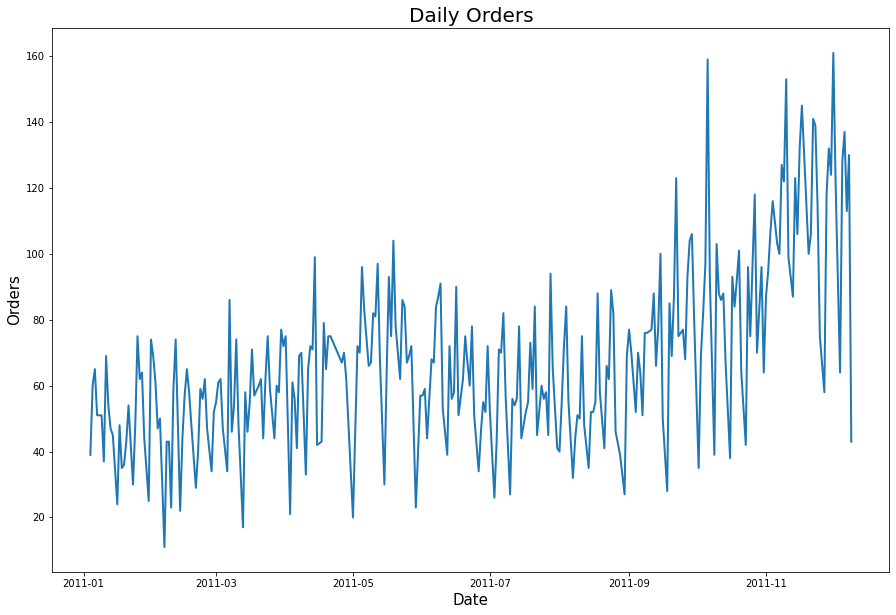

In [14]:
# Visualize daily orders

daily_metrics['num_orders'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Orders', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Orders', fontsize = 15)
plt.show()

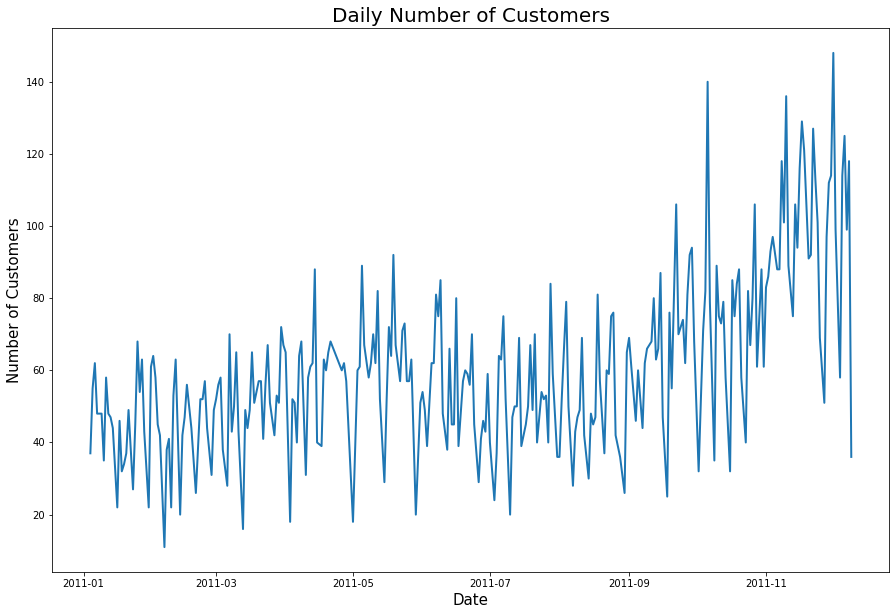

In [15]:
# Visualize daily number of customers

daily_metrics['num_customers'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Number of Customers', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.show()

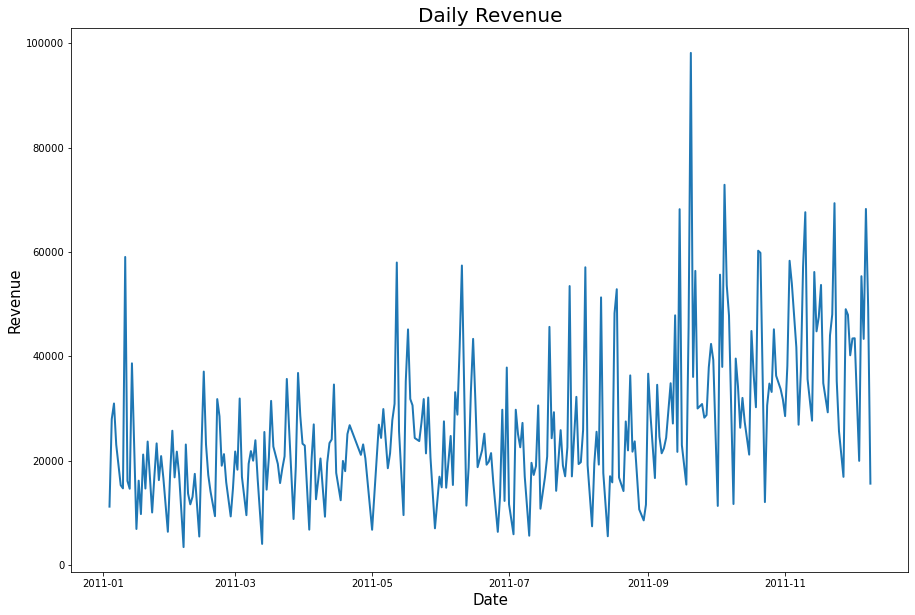

In [16]:
# Visualize daily revenue

daily_metrics['revenue'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Revenue', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

#### **10. What are the top 10 most popular geographical locations in 2011?**

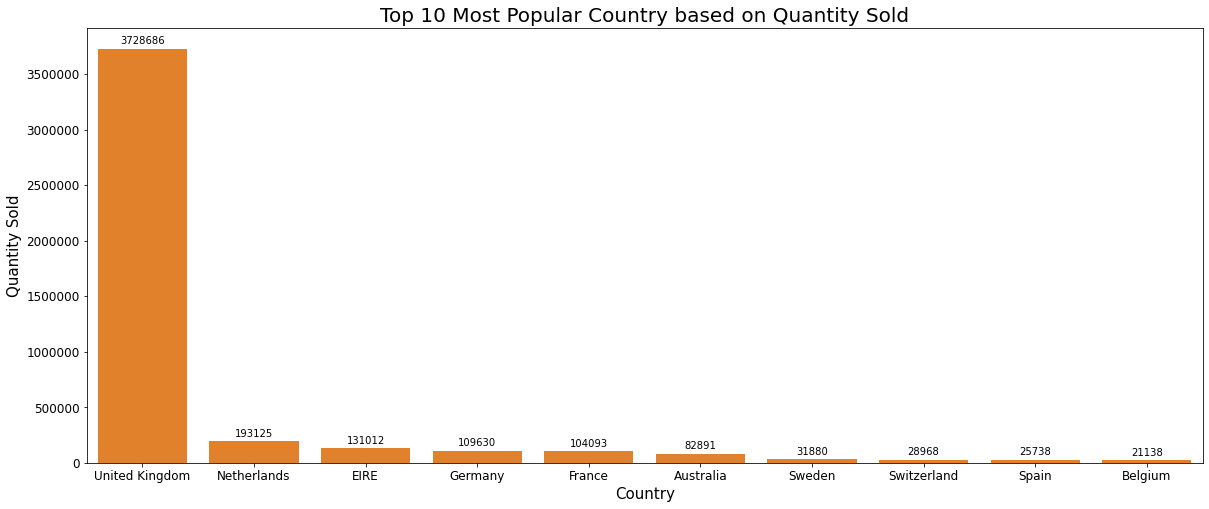

In [17]:
# What are the top 10 most popular geographical locations in 2011?

top10_country = online_trans_2011.groupby(['country'])['quantity'].sum().sort_values(ascending = False)[:10]

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[1]

ax = sns.barplot(x = top10_country.index, y = top10_country.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d')# annotates bar plots with labels without scientific notation

plt.title('Top 10 Most Popular Country based on Quantity Sold', size = 20)
plt.xlabel('Country', size = 15)
plt.ylabel('Quantity Sold', size = 15)
yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000]
ax.set_yticklabels(yticks)
plt.show;

> The e-commerce company is based in the UK, therefore, it is not surprising to see that majority of its sales are in the UK. 

#### **11. What are the top 10 most popular country based on revenue in 2011?**

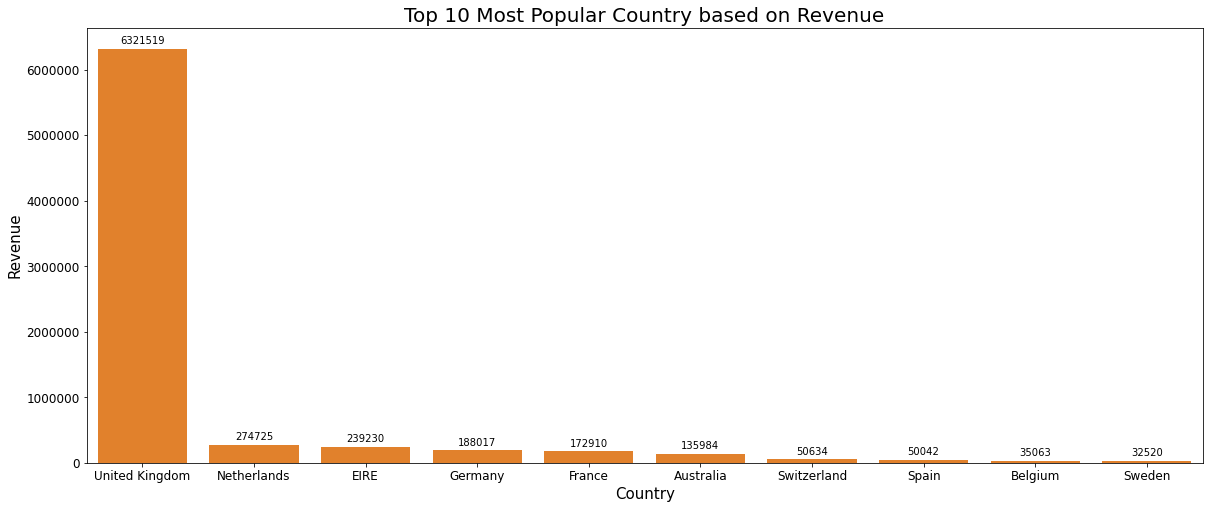

In [18]:
# Which country spent the most in 2011?

top10_country_rev = online_trans_2011.groupby(['country'])['total_order_value'].sum().sort_values(ascending = False)[:10]

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[1]

ax = sns.barplot(x = top10_country_rev.index, y = top10_country_rev.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d')# annotates bar plots with labels without scientific notation

plt.title('Top 10 Most Popular Country based on Revenue', size = 20)
plt.xlabel('Country', size = 15)
plt.ylabel('Revenue', size = 15)
yticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]
ax.set_yticklabels(yticks)
plt.show;

> As expected, The UK generated the highest revenue of 6M+

#### **12. For year 2011, which customers could be considered high profile customers?**
- Identify customers that have spent more than the average customer.
- Which customers have purchased the most?
- Can you say anything about customers that purchased recently?

In [19]:
# Create a dataframe to include only 2011 transactions and create a hypothetical snapshot date

online_trans_2011 = online_trans[online_trans['invoice_date'].dt.year == 2011]
snapshot_date = online_trans_2011['date'].max() + timedelta(days = 1)
print(snapshot_date)

2011-12-10


In [20]:
# Calculate recency, frequency, monetary value metrics per customer

rfm_2011 = online_trans_2011.groupby(['customer_id']).agg({
    'date': lambda x: (snapshot_date - x.max()).days,
    'invoice': 'nunique',
    'total_order_value': 'sum'
}).reset_index()

rfm_2011.rename(columns = {'date': 'recency',
                           'invoice': 'frequency',
                           'total_order_value': 'monetary_value'}, inplace=True)

rfm_2011.head()
print('There are {:,} records of customers grouped by recency, frequency and monetary value'.format(rfm_2011.shape[0]))

There are 4,218 records of customers grouped by recency, frequency and monetary value


#### Identify customers that have spent more than the average customer

In [21]:
# Calculate average customer spend

ave_cust_spend = round(rfm_2011['monetary_value'].mean(), 2)
ave_cust_spend

1829.95

In [22]:
# Identify customers that have spent more than the average customer

top_cust_spend = rfm_2011[rfm_2011['monetary_value'] > ave_cust_spend].sort_values('monetary_value', ascending = False)
print(f'There are {len(top_cust_spend)} customers who have spent more than the average spend of $1829.95')
top_cust_spend[:20]

There are 877 customers who have spent more than the average spend of $1829.95


,customer_id,recency,frequency,monetary_value
1650,u14646,2,71,270201.14
4087,u18102,1,56,231822.69
3637,u1745,9,44,187546.69
54,u12415,25,20,123638.18
1837,u14911,2,223,122284.51
1301,u14156,10,62,113371.07
3678,u17511,3,41,81503.44
3100,u16684,5,25,62806.72
973,u13694,4,53,60076.50
2125,u15311,1,103,56703.37


> There are 877 out of 4218 customers who have spent more than the average customer spend of $ 1829.95

#### Which customers have purchased the most?

In [23]:
rfm_2011.sort_values('frequency', ascending = False)[:10]

,customer_id,recency,frequency,monetary_value
1837,u14911,2,223,122284.51
315,u12748,1,177,25727.67
3910,u17841,2,159,37384.87
1621,u14606,2,111,10281.59
2125,u15311,1,103,56703.37
546,u13089,3,102,51479.32
468,u12971,4,80,10533.57
1650,u14646,2,71,270201.14
772,u13408,2,67,24886.53
1301,u14156,10,62,113371.07


#### Can you say anything about customers who purchased recently?

In [24]:
rfm_2011[rfm_2011['recency'] == 1].sort_values(by = ['monetary_value', 'frequency'], ascending = False)

,customer_id,recency,frequency,monetary_value
4087,u18102,1,56,231822.69
2125,u15311,1,103,56703.37
3592,u17389,1,42,31317.48
315,u12748,1,177,25727.67
1033,u13777,1,29,18838.32
3621,u17428,1,31,16184.50
1227,u14051,1,23,13649.18
3113,u16705,1,26,12816.36
564,u13113,1,37,10182.53
3726,u17581,1,27,9947.23


> - Most of the customers who purchased recently are also frequent customers. They had more than 20 orders in a year.
> - Most of them also spent more than the average customer spend.

#### 13. What are the most active times of day in terms of number of customers?

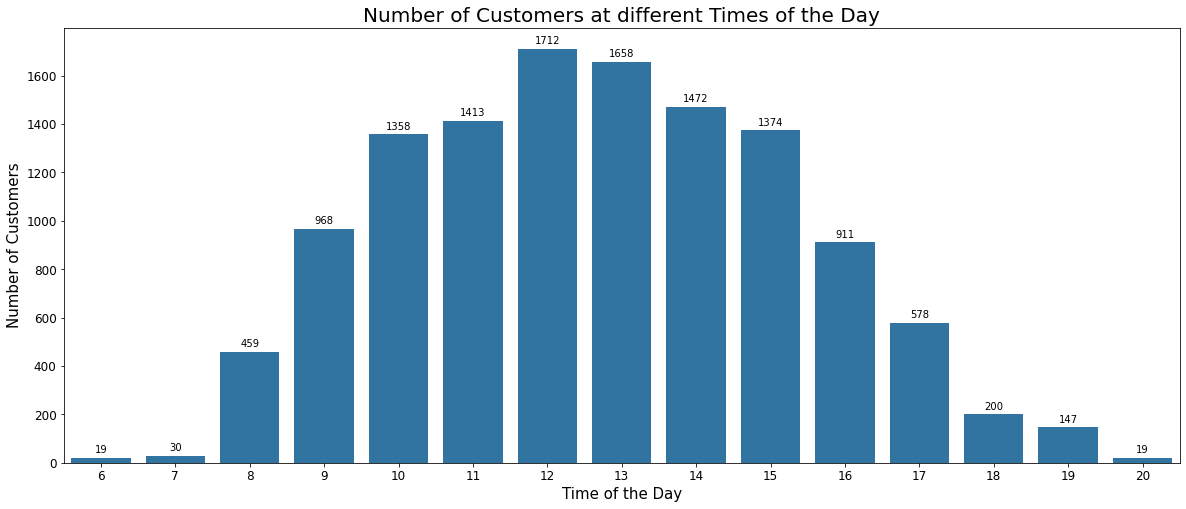

In [25]:
hourly_cust = online_trans.groupby(['hour'])['customer_id'].nunique()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = hourly_cust.index, y = hourly_cust.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3) 

plt.title('Number of Customers at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Number of Customers', size = 15)
plt.show();

> The bar plot shows that the customers are most active between 10 AM and 3PM. The highest peak is at 12 PM.

#### 14. Which times of day generated the highest revenue?

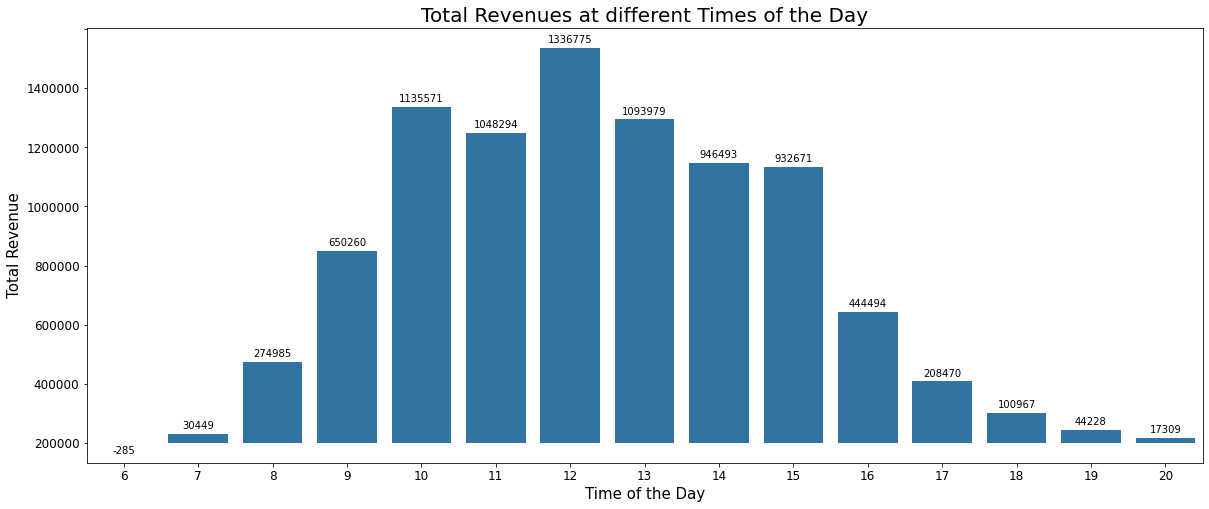

In [26]:
hourly_revenue = online_trans.groupby(['hour'])['total_order_value'].sum()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = hourly_revenue.index, y = hourly_revenue.values, color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Revenues at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Revenue', size = 15)
yticks = [0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
ax.set_yticklabels(yticks)
plt.show();

> The bar plot shows that revenues were high between 10 AM and 3PM. The highest revenue was generated at 12 PM.

#### 15. Is there a relationship between price, quantity and total order value?

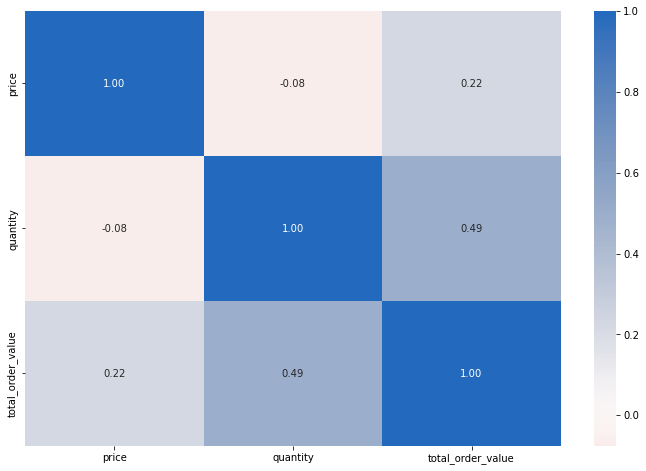

In [27]:
# Correlation plot between price, quantity and total order value

plt.figure(figsize = [12, 8])
sns.heatmap(online_trans[['price', 'quantity', 'total_order_value']].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

> - There is a weak positive relationship ``0.22`` between price and order value. It just means that high-priced product don't necessarily result to high sales amount.
> - There is also a quite good relationship ``0.49`` between quantity and order value. It suggests that larger quantities purchased can result to higher sales.
> - There is a week negative relationship ``-0.08`` between price and quantity. It's like high-priced products are purchased less than the low-priced products